In [1]:
import random
from time import perf_counter
import datetime
import retroactive_queue
import matplotlib.pyplot as plt

#batchs = [500, 1000, 1500, 2000, 2500, 3000] # batch sizes to test
batchs =[1000, 3000, 5000, 7000, 9000] # batch sizes to test

n_values = batchs[-1] # number of values to insert in the queue

n_iterations = 4 # number of iterations to average the results, 4 is the most common value in papers

In [2]:
# NOT the best way to generate random datetime objects, but we aren't measuring this, this is just random test data
n_values = batchs[-1]

def generate_random_test_data(n_elements):
    list_datetime = [0]*n_elements
    list_string = [0]*n_elements
    # generate n random datetime objects

    for i in range(n_elements):
        year = random.randint(2000, 2020)
        month = random.randint(1, 12)
        day = random.randint(1, 28)
        hour = random.randint(0, 23)
        minute = random.randint(0, 59)
        second = random.randint(0, 59)
        microsecond = random.randint(0, 999999)

        list_datetime[i] = datetime.datetime(year, month, day, hour, minute, second, microsecond)
    
    # generate n random strings
    for i in range(n_elements):
        list_string[i] = random.randint(0, n_values)
    
    # merge so [time, value]
    for i in range(n_elements):
        list_datetime[i] = [list_datetime[i], list_string[i]]

    return list_datetime

mother_list = generate_random_test_data(n_values)

# sort list by datetime
ordered_list = sorted(mother_list, key=lambda x: x[0])

for i in range(1, 10):
    print(mother_list[i]) # random show

print("")

for i in range(1, 10):
    print(ordered_list[i]) # random show


[datetime.datetime(2002, 1, 15, 15, 41, 8, 301543), 269]
[datetime.datetime(2013, 1, 18, 14, 40, 0, 349460), 2568]
[datetime.datetime(2006, 3, 1, 13, 55, 50, 14572), 5793]
[datetime.datetime(2009, 4, 22, 10, 32, 56, 451798), 7703]
[datetime.datetime(2012, 6, 17, 17, 5, 11, 827743), 3058]
[datetime.datetime(2000, 3, 21, 12, 49, 37, 781241), 6956]
[datetime.datetime(2012, 11, 24, 17, 12, 19, 742123), 852]
[datetime.datetime(2004, 8, 21, 10, 43, 17, 578101), 8359]
[datetime.datetime(2008, 10, 19, 18, 34, 33, 77553), 4789]

[datetime.datetime(2000, 1, 1, 12, 56, 56, 292324), 8435]
[datetime.datetime(2000, 1, 4, 4, 1, 41, 91732), 6780]
[datetime.datetime(2000, 1, 5, 10, 3, 51, 149077), 8324]
[datetime.datetime(2000, 1, 5, 20, 1, 9, 298935), 2881]
[datetime.datetime(2000, 1, 6, 20, 51, 55, 50785), 6463]
[datetime.datetime(2000, 1, 6, 21, 24, 50, 370823), 6322]
[datetime.datetime(2000, 1, 6, 21, 57, 46, 901570), 589]
[datetime.datetime(2000, 1, 7, 5, 59, 32, 325604), 7859]
[datetime.datetime(

In [3]:
def push_performance(batch_size, list):
    
    start = perf_counter()

    for i in range(n_iterations): 
        queue = retroactive_queue.queue(datetime.datetime(2010, 1, 1, 12, 0, 0), "a")
        
        # push n elements
        for j in range(batch_size):
            queue.push(list[j][0], list[j][1])
        
        # reset queue
        queue = None # in theory this shouldn't add much time so we dont measure it
    
    end = perf_counter()
    
    return (end - start) / n_iterations

def pop_performance(batch_size, list):
    
    start = perf_counter()
    aux = 0

    for i in range(n_iterations): 
        queue = retroactive_queue.queue(datetime.datetime(2010, 1, 1, 12, 0, 0), "a")
        
        # push n elements to pop later, don't measure this time
        aux1 = perf_counter()
        for j in range(batch_size):
            queue.push(list[j][0], list[j][1])
        # turn list upside down to pop in reverse order, so last added first removed
        list = list[::-1]
        aux2 = perf_counter()
        aux += aux2 - aux1 # time to push n elements, discard this time

        # pop n elements
        for j in range(batch_size):
            queue.pop(list[-j][0])
        # reset queue
        queue = None
        
        aux3 = perf_counter()
        # turn list upside down to pop in reverse order
        list = list[::-1]
        aux4 = perf_counter()
        aux += aux4 - aux3
    
    end = perf_counter()
    
    return (end - start - aux) / n_iterations

In [4]:
def evaluate_performance(batchs, list):
    push_results = []
    pop_results = []

    for batch in batchs:
        push_time = push_performance(batch, list)
        pop_time = pop_performance(batch, list)
        
        push_results.append(push_time)
        pop_results.append(pop_time)
        
        print(f"Batch size: {batch}")
        
    return push_results, pop_results

In [5]:
ordered_push_results, ordered_pop_results = evaluate_performance(batchs, ordered_list)
disordered_push_results, disordered_pop_results = evaluate_performance(batchs, mother_list)

Batch size: 1000
Batch size: 3000
Batch size: 5000
Batch size: 7000
Batch size: 9000
Batch size: 1000
Batch size: 3000
Batch size: 5000
Batch size: 7000
Batch size: 9000


looks like time for pop isn't as good as I thought, definitely has something to do with the inorder traversal search of the tree

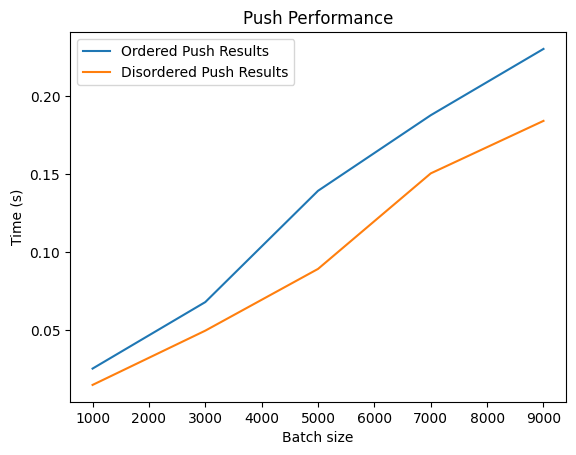

In [6]:
# plot push_results
plt.plot(batchs, ordered_push_results, label="Ordered Push Results")
plt.plot(batchs, disordered_push_results, label="Disordered Push Results")
plt.xlabel("Batch size")
plt.ylabel("Time (s)")
plt.title("Push Performance")
plt.legend()
plt.show()

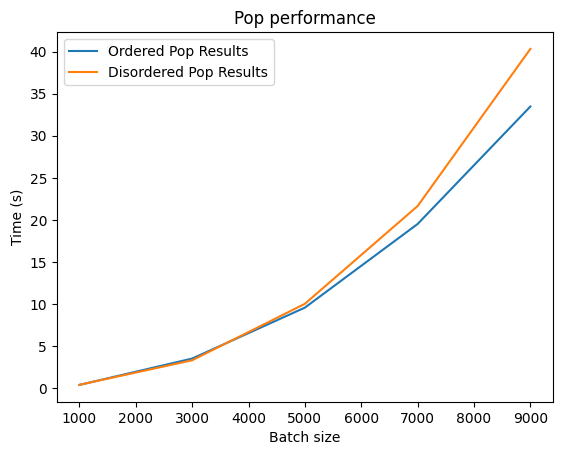

In [7]:
plt.plot(batchs, ordered_pop_results, label="Ordered Pop Results")
plt.plot(batchs, disordered_pop_results, label="Disordered Pop Results")
plt.xlabel("Batch size")
plt.ylabel("Time (s)")
plt.title("Pop performance")
plt.legend()
plt.show()